# 经典平均风险优化
## 1. 下载数据
通过同花顺iFind金融终端获取中信一级行业指数5年数据，将数据集保存在'./data/index_dataset.xlsx'中，通过pandas导入数据，并将日期列作为索引并将格式转换为时间戳。

In [3]:
import pandas as pd

datapath = './data/index_dataset.xlsx'
data = pd.read_excel(datapath,
                   index_col='时间',
                   parse_dates=True)
data.head()

,石油石化指数,煤炭指数,有色金属指数,电力及公用事业指数,钢铁指数,基础化工指数,建筑指数,建材指数,轻工制造指数,机械指数,...,银行指数,非银行金融指数,房地产指数,交通运输指数,电子指数,通信指数,计算机指数,传媒指数,综合指数,综合金融指数
时间,,,,,,,,,,,,,,,,,,,,,
2017-05-02,2362.3458,1723.4851,4825.3522,3167.8903,1610.6183,5355.6170,4867.6052,6076.6740,4076.9029,6482.7169,...,6050.3818,7434.9220,7137.9773,2099.5949,5401.7213,4946.3995,5253.0578,3964.1138,6162.9945,1498.1395
2017-05-03,2357.0512,1720.7553,4818.3106,3128.7964,1595.1833,5340.2764,4836.3294,6092.1407,4076.1676,6467.2433,...,6016.3051,7411.9343,7082.1843,2102.1390,5399.4468,4967.2974,5241.3817,3951.4195,6069.8956,1486.6787
2017-05-04,2346.1544,1696.0707,4735.2452,3137.5726,1598.4710,5314.8573,4880.6585,6167.5136,4052.4629,6450.4133,...,5990.6726,7371.5710,7074.9968,2091.1563,5405.5995,4938.9754,5244.7862,3929.5411,6090.7924,1487.6243
2017-05-05,2315.1488,1658.2160,4669.5889,3097.0160,1579.6599,5243.0617,4827.4211,6068.6036,4016.2500,6353.0914,...,5987.3776,7269.2575,7008.1095,2070.2135,5350.2750,4891.7826,5170.4242,3901.1083,5985.3962,1466.3870
2017-05-08,2312.6899,1642.7489,4610.8273,3032.4300,1551.7028,5147.6704,4733.5903,5880.3205,3946.0523,6214.3442,...,5995.8893,7285.4822,6876.5120,2036.9678,5220.1282,4831.2670,5138.3259,3898.6304,5763.3356,1404.7034


In [6]:
import warnings
from IPython import display
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# 计算日收益
Y = data.pct_change().dropna()
display(Y)

,石油石化指数,煤炭指数,有色金属指数,电力及公用事业指数,钢铁指数,基础化工指数,建筑指数,建材指数,轻工制造指数,机械指数,...,银行指数,非银行金融指数,房地产指数,交通运输指数,电子指数,通信指数,计算机指数,传媒指数,综合指数,综合金融指数
时间,,,,,,,,,,,,,,,,,,,,,
2017-05-03,-0.2241%,-0.1584%,-0.1459%,-1.2341%,-0.9583%,-0.2864%,-0.6425%,0.2545%,-0.0180%,-0.2387%,...,-0.5632%,-0.3092%,-0.7816%,0.1212%,-0.0421%,0.4225%,-0.2223%,-0.3202%,-1.5106%,-0.7650%
2017-05-04,-0.4623%,-1.4345%,-1.7240%,0.2805%,0.2061%,-0.4760%,0.9166%,1.2372%,-0.5815%,-0.2602%,...,-0.4261%,-0.5446%,-0.1015%,-0.5225%,0.1140%,-0.5702%,0.0650%,-0.5537%,0.3443%,0.0636%
2017-05-05,-1.3215%,-2.2319%,-1.3865%,-1.2926%,-1.1768%,-1.3508%,-1.0908%,-1.6037%,-0.8936%,-1.5088%,...,-0.0550%,-1.3879%,-0.9454%,-1.0015%,-1.0235%,-0.9555%,-1.4178%,-0.7236%,-1.7304%,-1.4276%
2017-05-08,-0.1062%,-0.9328%,-1.2584%,-2.0854%,-1.7698%,-1.8194%,-1.9437%,-3.1026%,-1.7478%,-2.1839%,...,0.1422%,0.2232%,-1.8778%,-1.6059%,-2.4325%,-1.2371%,-0.6208%,-0.0635%,-3.7100%,-4.2065%
2017-05-09,0.2447%,0.5682%,0.6494%,0.9601%,0.1290%,0.6364%,-0.1347%,0.4029%,0.4656%,0.8602%,...,0.0780%,-0.1190%,0.1623%,0.3024%,1.5190%,0.8056%,0.5159%,0.6787%,0.7387%,1.7583%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,-4.6496%,-6.4844%,-8.4022%,-4.9834%,-6.9560%,-7.4192%,-4.4763%,-4.7861%,-6.8271%,-7.4835%,...,-4.5303%,-3.9597%,-5.3830%,-5.3418%,-7.4985%,-6.0408%,-6.9058%,-7.6379%,-6.8925%,-5.8758%
2022-04-26,-2.9210%,-4.3741%,-3.4913%,-1.6711%,-2.5619%,-3.1058%,1.2051%,0.1306%,-3.1399%,-3.3383%,...,-0.3028%,-4.2047%,0.1119%,-1.5023%,-2.9081%,-1.7692%,-3.7489%,-1.7796%,-2.5720%,-2.5636%
2022-04-27,2.3732%,4.2125%,6.9423%,2.4611%,3.8445%,5.6792%,3.5936%,4.2577%,1.6655%,4.9349%,...,-0.0472%,0.9333%,-1.6782%,2.0137%,5.9019%,3.6896%,4.6320%,3.2466%,3.4561%,0.9622%


## 2. 估计均值方差组合
### 2.1 计算夏普比率最大化的组合

In [7]:
import riskfolio as rp

# Building the portfolio object
# 构建投资组合对象
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio
# 计算最优组合

# Select method and estimate input parameters:
# 选择方法并估计输入参数

method_mu='hist' # Method to estimate expected returns based on historical data. 通过历史数据估计预期收益
method_cov='hist' # Method to estimate covariance matrix based on historical data. 基于历史数据估计协方差矩阵

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:
# 估计最优投资组合：

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance 使用的风险度量方法，这里将运用方差
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe 目标函数，可以是 MinRisk、MaxRet、Utility 或 Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios 风险度量依赖历史情境
rf = 0 # Risk free rate 无风险利率
l = 0 # Risk aversion factor, only useful when obj is 'Utility' 风险厌恶因子

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,石油石化指数,煤炭指数,有色金属指数,电力及公用事业指数,钢铁指数,基础化工指数,建筑指数,建材指数,轻工制造指数,机械指数,...,银行指数,非银行金融指数,房地产指数,交通运输指数,电子指数,通信指数,计算机指数,传媒指数,综合指数,综合金融指数
weights,0.0000%,27.4910%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


### 2.2 绘制组合构成饼图

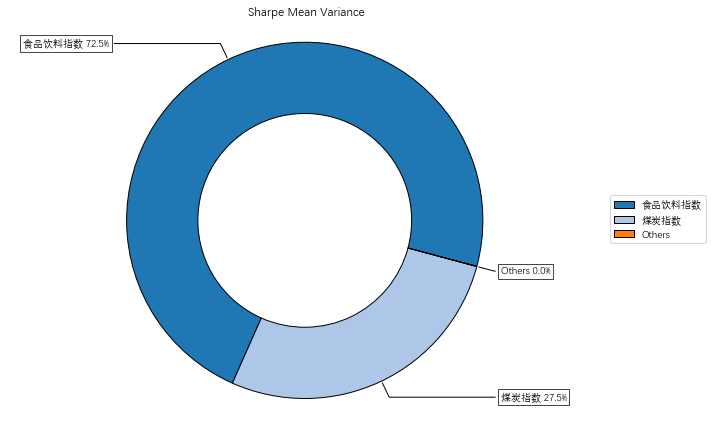

In [9]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Dengxian', 'sans-serif']

# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 计算有效前沿

In [10]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,石油石化指数,煤炭指数,有色金属指数,电力及公用事业指数,钢铁指数,基础化工指数,建筑指数,建材指数,轻工制造指数,机械指数,...,银行指数,非银行金融指数,房地产指数,交通运输指数,电子指数,通信指数,计算机指数,传媒指数,综合指数,综合金融指数
0,1.1068%,0.0000%,0.0000%,33.2302%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,39.1526%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,4.5885%,0.0000%,0.0000%,31.8129%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,41.8401%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
2,4.1901%,1.1671%,0.0000%,26.7671%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,42.5694%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
3,2.7290%,3.3621%,0.0000%,22.5772%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,43.0026%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
4,1.4530%,5.2807%,0.0000%,18.9127%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,43.3814%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


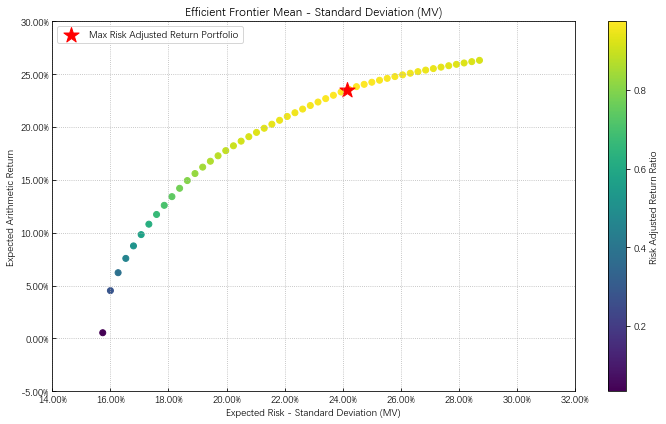

In [11]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

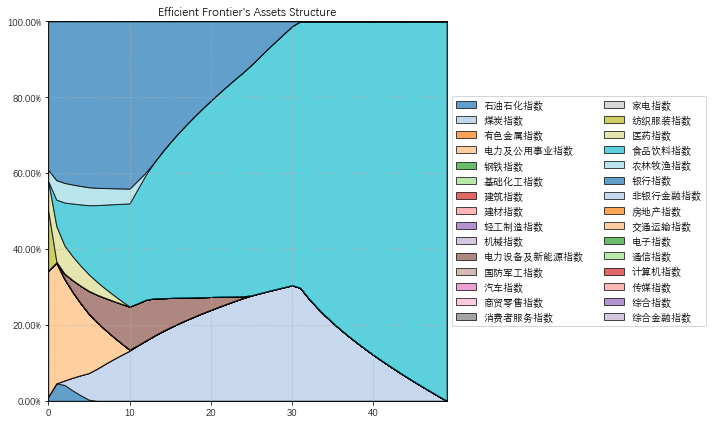

In [16]:
# Plotting efficient frontier composition
# 绘制有效的前沿组合

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. 估计平均风险组合
在这一部分中，我将计算几种风险度量的最优投资组合。首先，当 CVaR 是风险度量时，我将计算风险调整后收益最大化的投资组合，然后我将计算所有可用风险度量的风险调整后收益最大化的投资组合。
### 3.1 计算最大化回报/CVaR 比率的投资组合。

In [17]:
rm = 'CVaR' # Risk measure 风险度量

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,石油石化指数,煤炭指数,有色金属指数,电力及公用事业指数,钢铁指数,基础化工指数,建筑指数,建材指数,轻工制造指数,机械指数,...,银行指数,非银行金融指数,房地产指数,交通运输指数,电子指数,通信指数,计算机指数,传媒指数,综合指数,综合金融指数
weights,0.0000%,21.4139%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


### 3.2 绘制投资组合饼图

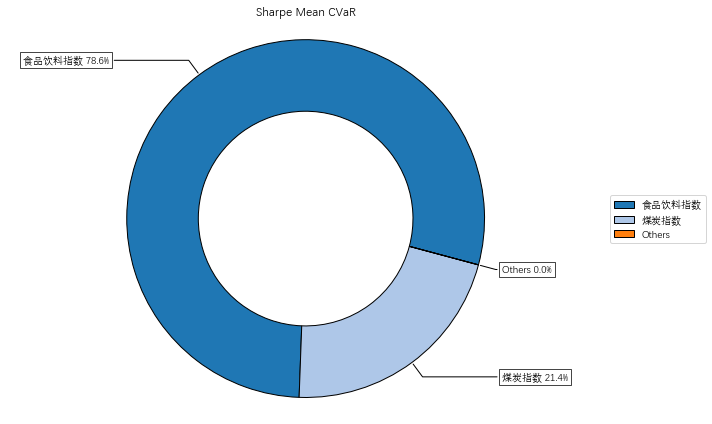

In [18]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 计算有效前沿

In [19]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,石油石化指数,煤炭指数,有色金属指数,电力及公用事业指数,钢铁指数,基础化工指数,建筑指数,建材指数,轻工制造指数,机械指数,...,银行指数,非银行金融指数,房地产指数,交通运输指数,电子指数,通信指数,计算机指数,传媒指数,综合指数,综合金融指数
0,0.0000%,0.0000%,0.0000%,31.3681%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,48.2699%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,0.0000%,24.0513%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,54.4548%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,0.0000%,14.4054%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,57.3578%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,0.0000%,8.7066%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,58.7073%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,2.2700%,0.0000%,5.3939%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,57.8112%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


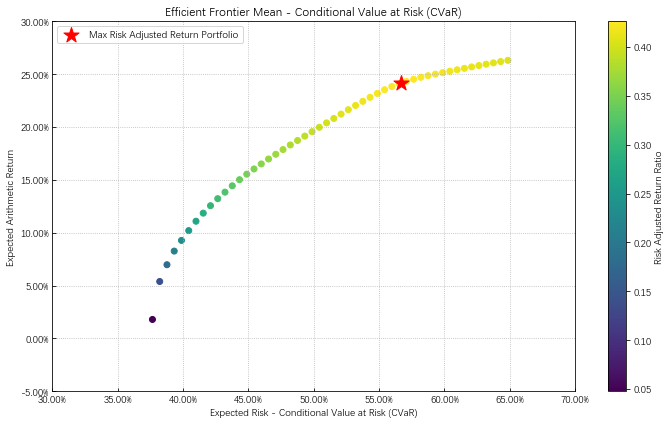

In [20]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

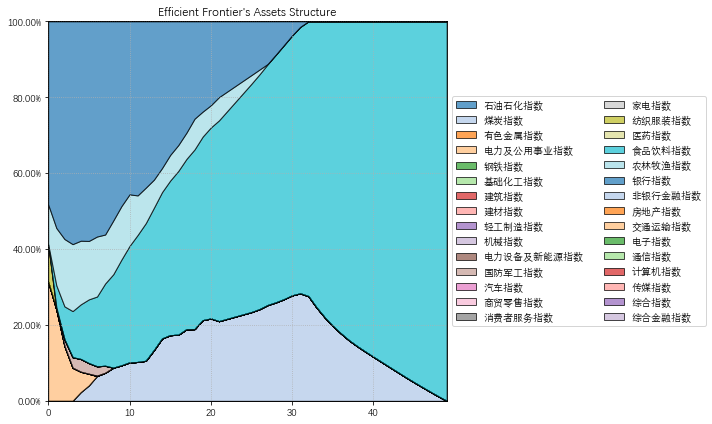

In [21]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### 3.4 计算多种风险度量的最佳投资组合

In [22]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)

w_s.columns = rms

In [23]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
石油石化指数,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
煤炭指数,27.49%,27.35%,25.58%,26.74%,25.47%,21.41%,14.30%,7.65%,4.86%,25.91%,15.04%,23.38%,16.71%
有色金属指数,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
电力及公用事业指数,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
钢铁指数,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
基础化工指数,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
建筑指数,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
建材指数,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
轻工制造指数,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
机械指数,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

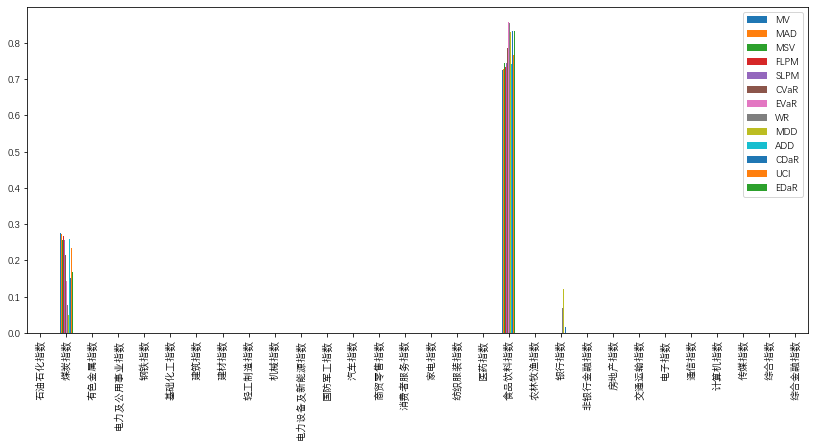

In [24]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

## 4 限制资产和资产类别
### 4.1 构建约束条件
可以使用字典来创建约束，但更喜欢在 excel 中创建表并使用 pandas.read_excel 上传它们。
尝试运用pandas.read_excel创建约束

In [27]:
# 从Excel导入asset_classes
asset_classes = pd.read_excel('./data/assets_classes.xlsx')
display(asset_classes)

,Assets,Industry
0,石油石化指数,能源化工
1,煤炭指数,能源化工
2,有色金属指数,金属冶炼
3,电力及公用事业指数,能源化工
4,钢铁指数,金属冶炼
5,基础化工指数,能源化工
6,建筑指数,建筑施工
7,建材指数,建筑施工
8,轻工制造指数,机械制造
9,机械指数,机械制造


In [28]:
#从Excel导入constraints
constraints = pd.read_excel('./data/constraints.xlsx')
display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,NaN,NaN,<=,10.0000%,NaN,NaN,NaN,NaN
1,False,Classes,Industry,消费电子,<=,20.0000%,NaN,NaN,NaN,NaN
2,False,Classes,Industry,建筑施工,<=,20.0000%,NaN,NaN,NaN,NaN
3,False,Classes,Industry,机械制造,<=,20.0000%,NaN,NaN,NaN,NaN
4,False,Classes,Industry,能源化工,<=,20.0000%,NaN,NaN,NaN,NaN
5,False,Classes,Industry,金融证券,<=,20.0000%,NaN,NaN,NaN,NaN


In [29]:
A, B = rp.assets_constraints(constraints, asset_classes)

### 4.2 使用约束优化投资组合

In [30]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,石油石化指数,煤炭指数,有色金属指数,电力及公用事业指数,钢铁指数,基础化工指数,建筑指数,建材指数,轻工制造指数,机械指数,...,银行指数,非银行金融指数,房地产指数,交通运输指数,电子指数,通信指数,计算机指数,传媒指数,综合指数,综合金融指数
weights,0.0000%,10.0000%,10.0000%,0.0000%,10.0000%,0.0000%,0.0000%,10.0000%,0.0000%,0.0000%,...,10.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


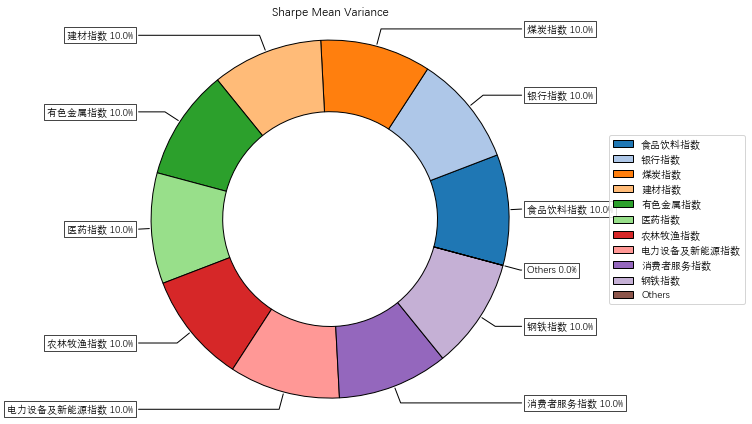

In [31]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [32]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)

display(w_classes)

,Industry,weights
石油石化指数,能源化工,0.0000%
煤炭指数,能源化工,10.0000%
有色金属指数,金属冶炼,10.0000%
电力及公用事业指数,能源化工,0.0000%
钢铁指数,金属冶炼,10.0000%
基础化工指数,能源化工,0.0000%
建筑指数,建筑施工,0.0000%
建材指数,建筑施工,10.0000%
轻工制造指数,机械制造,0.0000%
机械指数,机械制造,0.0000%


In [33]:
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
交通运输,0.0000%
农林牧渔,10.0000%
医药医疗,10.0000%
建筑施工,10.0000%
文化传媒,0.0000%
机械制造,0.0000%
消费电子,20.0000%
综合产业,0.0000%
能源化工,20.0000%


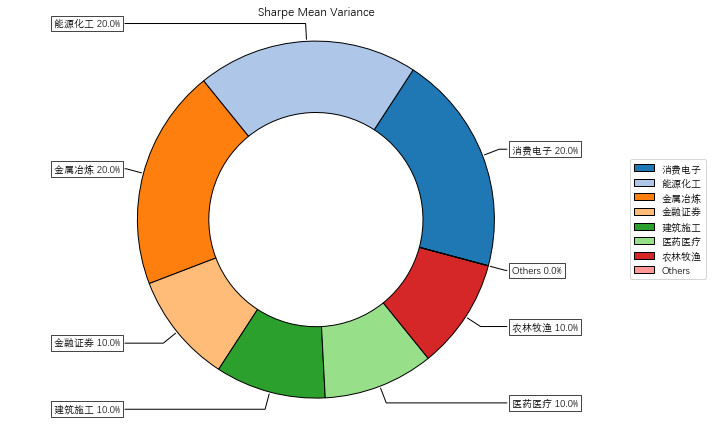

In [34]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

## 附：资产相关性

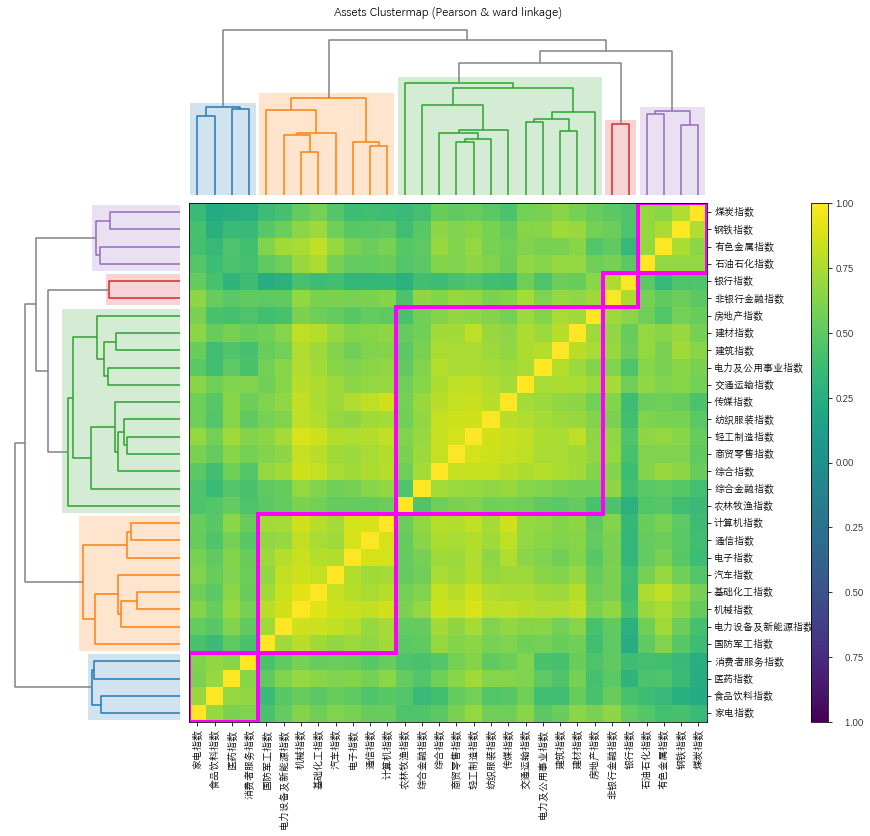

In [36]:
ax = rp.plot_clusters(returns=Y,
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

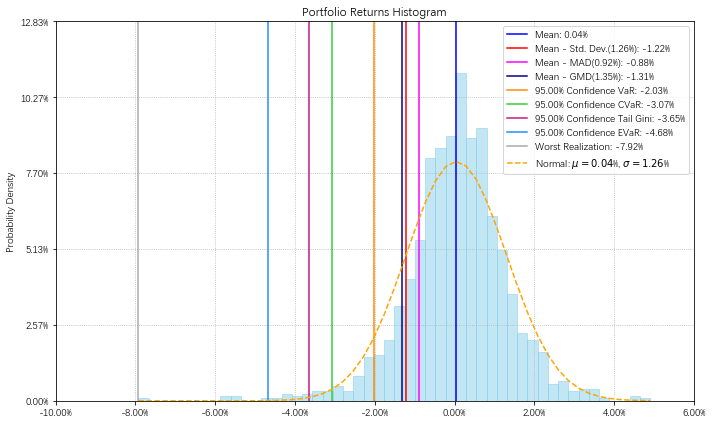

In [38]:
ax = rp.plot_hist(returns=Y, w=w, alpha=0.05, bins=50, height=6,
                  width=10, ax=None)

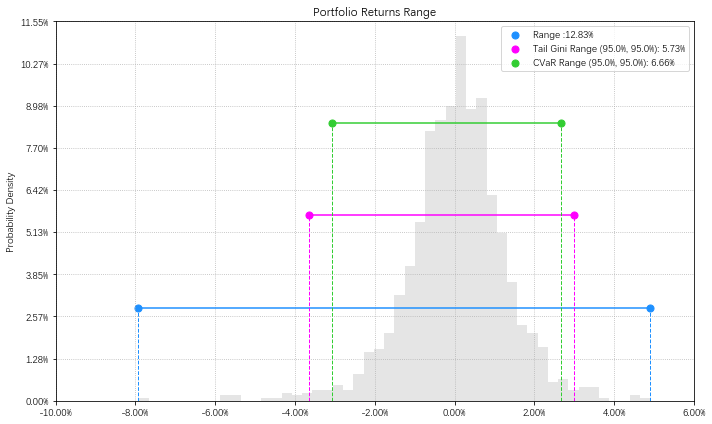

In [39]:
ax = rp.plot_range(returns=Y, w=w, alpha=0.05, a_sim=100, beta=None,
                b_sim=None, bins=50, height=6, width=10, ax=None)

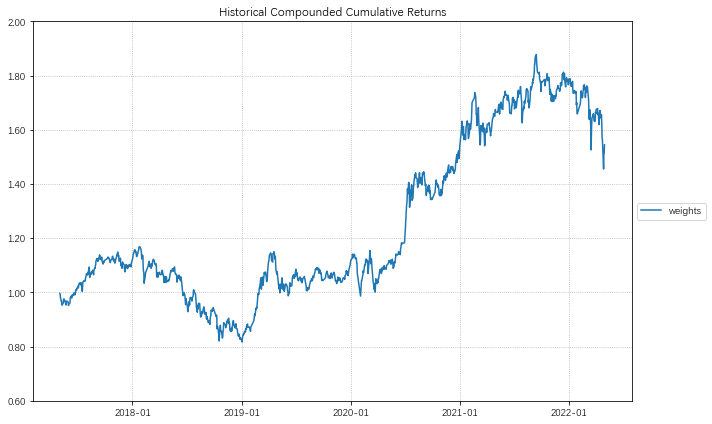

In [40]:
ax = rp.plot_series(returns=Y, w=w, cmap='tab20', height=6, width=10,
                    ax=None)

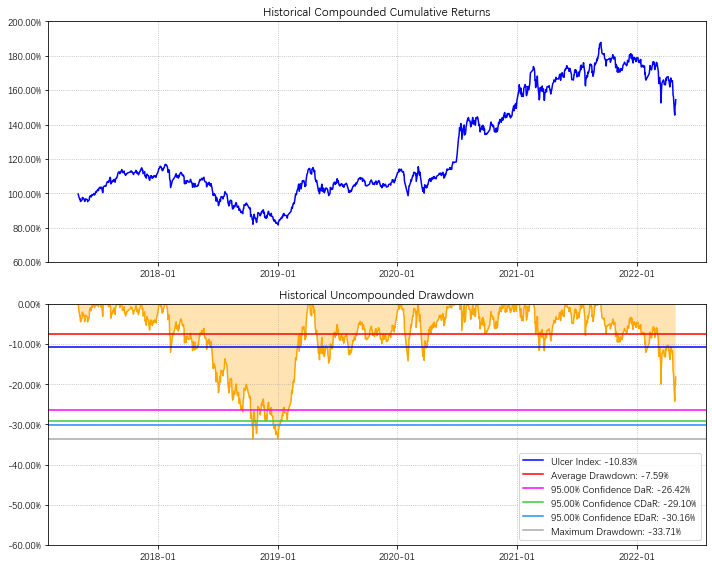

In [41]:
nav=port.nav

ax = rp.plot_drawdown(nav=nav, w=w, alpha=0.05, height=8, width=10, ax=None)

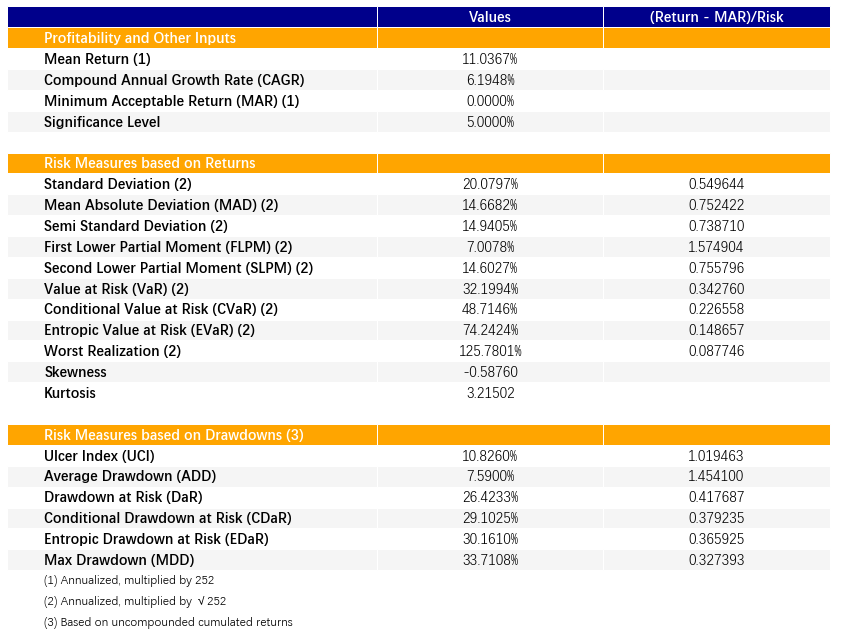

In [42]:
ax = rp.plot_table(returns=Y, w=w, MAR=0, alpha=0.05, ax=None)

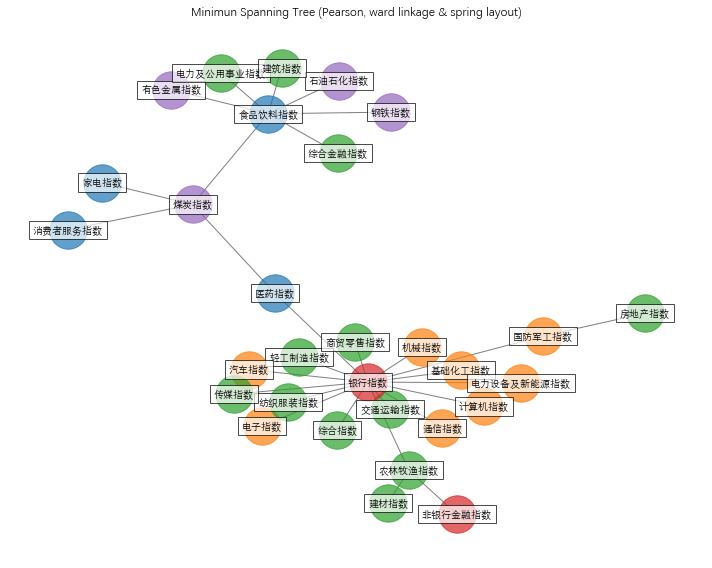

In [43]:
ax = rp.plot_network(returns=Y, codependence="pearson",
                     linkage="ward", k=None, max_k=10,
                     alpha_tail=0.05, leaf_order=True,
                     kind='spring', ax=None)

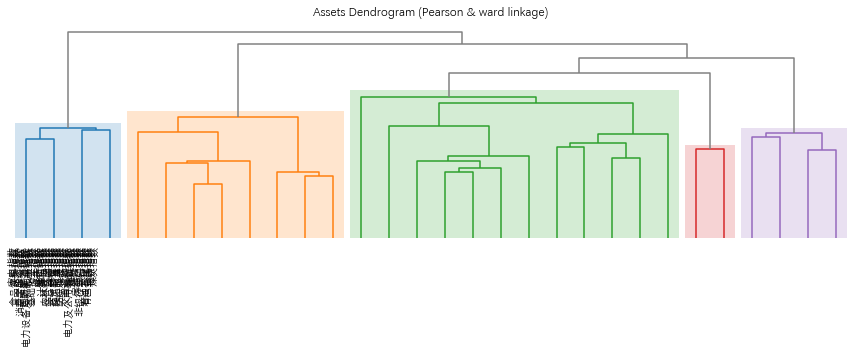

In [45]:
ax = rp.plot_dendrogram(returns=Y,
                        linkage='ward', k=None, max_k=10,
                        leaf_order=True, ax=None)